<a href="https://colab.research.google.com/github/djsg2021utec/project_Christian/blob/main/Proyecto_Christian_compartido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Objetivos de este Notebook**

---

Darle seguimiento a los requierimientos de visualización de datos del Trabajo Final de Máster (TFM) de Christian Quispe Cubas.

### **Entregables**
---
1. Primer Entregable: Extracción de datos de la API de _Climate Data Store_ (CDS) y creación de gráficas.
2. Segundo Entregable: Cálculo de correlaciones con la data de Christian.csv
2. Tercer Entregable: Correlación entre las medidas de ORCA con la presión y temperatura a las diferentes alturas.
3. Cuarto Entregable:

## **1. Primer Entregable**
---
**Objetivo**: Conseguir los Outputs

**Inputs**
---
**Fechas:**: 2020–03-01 a 2022-03-1

**Mediciones:** Temperatura, presión desde 0 km de altura hasta 20 km en intervalos de mil metros. Datos horarios (24 medidas/dia)

**Ubicación:** Base Juan Carlos I, Isla Livingston, archipielago Shetlands del Sur (Antártida)

**Outputs**
---

1. Gráfica única con las temperaturas en función del tiempo y para los 20 niveles de altura.
2. Gráfica única con las presiones en función del tiempo y para los 20 niveles de altura.



In [ ]:
#@title **Extraer datos con el API**
#@markdown Accesos: Ingrese el url y el key del API

import os

url = "https://cds.climate.copernicus.eu/api/v2" #@param {type:"string"}
key = "237754:87e792cd-fe09-4cde-b54f-f6e3f3aa59ae" #@param {type:"string"}
url = 'url: '+url
key = 'key: '+key

url = 'url: https://cds.climate.copernicus.eu/api/v2'
key = 'key: 237754:87e792cd-fe09-4cde-b54f-f6e3f3aa59ae'

with open('/root/.cdsapirc', 'w') as f:
    f.write('\n'.join([url, key]))

with open('/root/.cdsapirc') as f:
    print(f.read())



url: https://cds.climate.copernicus.eu/api/v2
key: 237754:87e792cd-fe09-4cde-b54f-f6e3f3aa59ae


In [ ]:

!pip install cdsapi

## Pegar la información del API
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-pressure-levels-monthly-means',
    {
        'format': 'netcdf',
        'variable': [
            'relative_humidity', 'temperature',
        ],
        'product_type': 'monthly_averaged_reanalysis_by_hour_of_day',
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'year': [
            '2020', '2021', '2022',
        ],
        'pressure_level': [
            '30', '50', '100',
            '200', '300', '400',
            '500', '600', '700',
            '800', '900', '1000',
        ],
        'area': [
            -62.65, -60.39, -62.67,
            -60.37,
        ],
    },
    'download.nc')

INFO:cdsapi:Welcome to the CDS
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels-monthly-means
INFO:cdsapi:Request is queued
INFO:cdsapi:Request is running


In [ ]:
# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

In [ ]:
enlace = "/content/drive/MyDrive/Datasets/Christian_Proyecto/juancarlos.nc"
#enlace = "/content/drive/MyDrive/Datasets/Christian_Proyecto/shetland.nc"

# Create Xarray Dataset
ds = xr.open_dataset(enlace)

In [ ]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 1, latitude: 1, level: 37, time: 864)
Coordinates:
  * longitude  (longitude) float32 -60.4
  * latitude   (latitude) float32 -62.67
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 2020-01-01 ... 2022-12-01T23:00:00
Data variables:
    t          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-08-06 03:58:10 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [ ]:
#Convertir la longitud en -180:180 grados
ds_180 = ds.assign_coords(longitude=(((ds.longitude + 180) % 360) - 180)).sortby('longitude')

In [ ]:
# Create Xarray Data Array
da = ds_180['t']

In [ ]:
da

<xarray.DataArray 't' (time: 864, level: 37, latitude: 1, longitude: 1)>
[31968 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -60.4
  * latitude   (latitude) float32 -62.67
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 2020-01-01 ... 2022-12-01T23:00:00
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

In [ ]:
da_degc = da - 273.15

In [ ]:
da_degc = da_degc.assign_attrs(da.attrs)
da_degc.attrs['units'] = '° C'

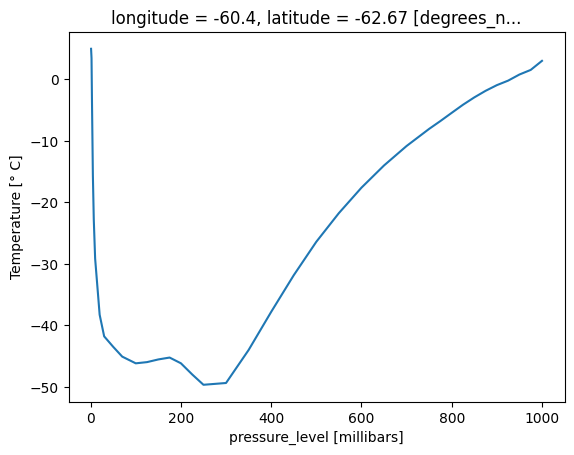

In [ ]:
da_degc[0,:,:].plot()

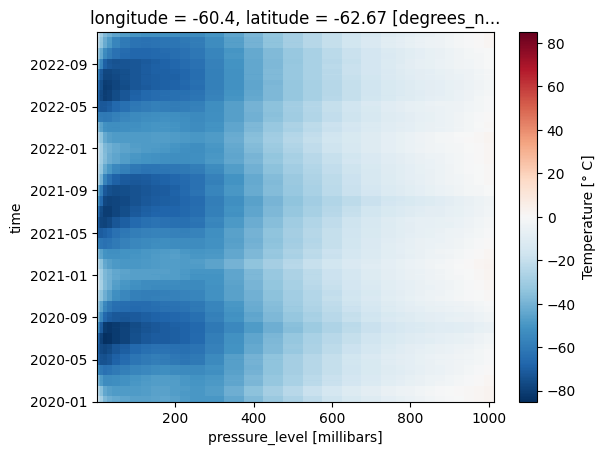

In [ ]:
da_degc[:,:,:].plot()

In [ ]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-pressure-levels-monthly-means',
    {
        'format': 'netcdf',
        'product_type': 'monthly_averaged_reanalysis_by_hour_of_day',
        'variable': 'temperature',
        'pressure_level': [
            '1', '2', '3',
            '5', '7', '10',
            '20', '30', '50',
            '70', '100', '125',
            '150', '175', '200',
            '225', '250', '300',
            '350', '400', '450',
            '500', '550', '600',
            '650', '700', '750',
            '775', '800', '825',
            '850', '875', '900',
            '925', '950', '975',
            '1000',
        ],
        'year': [
            '2020', '2021', '2022',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area': [
            -60, -63, -63,
            -53,
        ],
    },
    'shetland.nc')

2023-08-06 04:59:33,423 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-08-06 04:59:33,435 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels-monthly-means
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels-monthly-means
2023-08-06 04:59:33,784 INFO Request is queued
INFO:cdsapi:Request is queued
2023-08-06 04:59:35,015 INFO Request is running
INFO:cdsapi:Request is running
2023-08-06 05:28:07,500 INFO Request is completed
INFO:cdsapi:Request is completed
2023-08-06 05:28:07,505 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data0/adaptor.mars.internal-1691299502.805117-21651-11-8bfebeff-b474-49de-bcd8-40511276b909.nc to shetland.nc (32.5M)
INFO:cdsapi:Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data0/adaptor.mars.internal-1691299502.805117-21651-11-8bfebeff-b474-49de-bc

Result(content_length=34082952,content_type=application/x-netcdf,location=https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data0/adaptor.mars.internal-1691299502.805117-21651-11-8bfebeff-b474-49de-bcd8-40511276b909.nc)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. ANÁLISIS DE DATOS Y VISUALIZACIONES

In [ ]:
# librerías requeridas
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.pyplot as plt
!pip install cartopy #Instale solo una vez

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.7 MB/s eta 0:00:00


In [ ]:
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [ ]:
!wget https://github.com/djsg2021utec/project_Christian/raw/main/shetland.rar

--2023-08-16 21:21:48--  https://github.com/djsg2021utec/project_Christian/raw/main/shetland.rar
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/djsg2021utec/project_Christian/main/shetland.rar [following]
--2023-08-16 21:21:48--  https://raw.githubusercontent.com/djsg2021utec/project_Christian/main/shetland.rar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13514416 (13M) [application/octet-stream]
Saving to: ‘shetland.rar’

shetland.rar        100%[===================>]  12.89M  --.-KB/s    in 0.1s    

2023-08-16 21:21:49 (88.1 MB/s) - ‘shetland.rar’ saved [13514416/13514416]



In [ ]:
!unrar x /content/shetland.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/shetland.rar

Extracting  shetland.nc                                                   31% 62% 93%100%  OK 
All OK


(array([ 351573., 1358827., 1761022., 2385398., 1572251., 1270955.,
        1366988., 1876279., 4008355., 1087296.]),
 array([-85.36364746, -75.99589539, -66.62814331, -57.26039124,
        -47.89263916, -38.52488708, -29.15713501, -19.78938293,
        -10.42163086,  -1.05387878,   8.31387329]),
 <BarContainer object of 10 artists>)

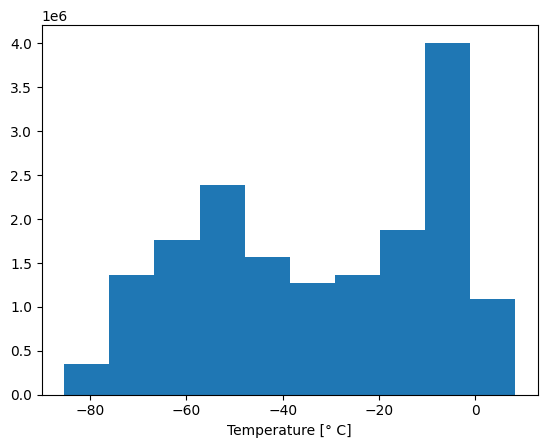

In [ ]:
enlace = "/content/shetland.nc"

# Create Xarray Dataset
ds_shetland = xr.open_dataset(enlace)
ds_shetland_180 = ds_shetland.assign_coords(longitude=(((ds_shetland.longitude + 180) % 360) - 180)).sortby('longitude')
da = ds_shetland_180['t']
da_degc = da - 273.15
da_degc = da_degc.assign_attrs(da.attrs)
da_degc.attrs['units'] = '° C'
da_degc[:,:,:].plot()

In [ ]:
ds_shetland

<xarray.Dataset>
Dimensions:    (longitude: 41, latitude: 13, level: 37, time: 864)
Coordinates:
  * longitude  (longitude) float32 -63.0 -62.75 -62.5 ... -53.5 -53.25 -53.0
  * latitude   (latitude) float32 -60.0 -60.25 -60.5 ... -62.5 -62.75 -63.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 2020-01-01 ... 2022-12-01T23:00:00
Data variables:
    t          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-08-06 05:26:05 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

### Gráfica de grandientes de temperatura a nivel de presión y tiempo específicos en el espacio geográfico

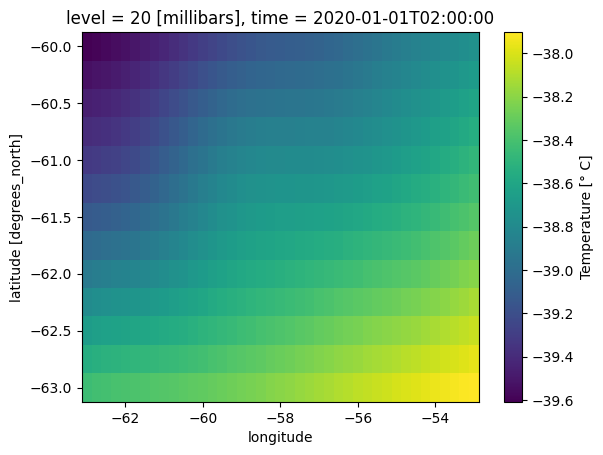

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

# Cargar el dataset
enlace = "/content/shetland.nc"
ds = xr.open_dataset(enlace)
ds_180 = ds.assign_coords(longitude=(((ds.longitude + 180) % 360) - 180)).sortby('longitude')
da = ds_180['t']
da_degc = da - 273.15
da_degc = da_degc.assign_attrs(da.attrs)
da_degc.attrs['units'] = '° C'

# Seleccionar datos para un nivel y tiempo específicos
data_to_plot = da_degc.sel(level=20, time=ds_180['time'][2:3], method='nearest').plot()

plt.show()

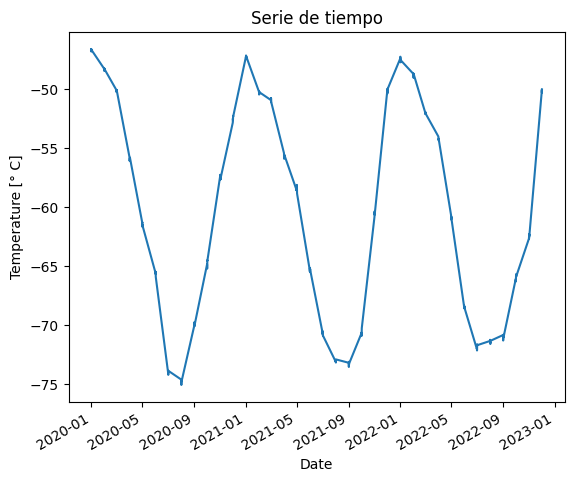

In [ ]:
data_to_plot = da_degc.sel(level=100, latitude = -61.5, longitude = -58, method='nearest')
data_to_plot.plot()
plt.title('Serie de tiempo')
plt.xlabel('Date')
plt.show()

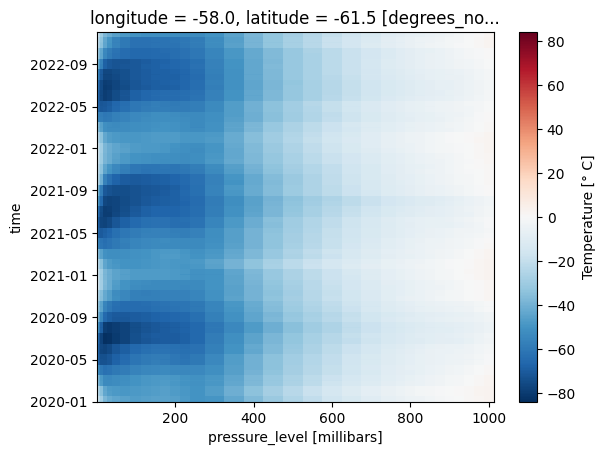

In [ ]:
data_to_plot = da_degc.sel(latitude = -61.5, longitude = -58, method='nearest')
data_to_plot.plot()
plt.show()

### Análisis de los datos de muones y neutrinos

In [ ]:
import pandas as pd

In [ ]:
data_mn = pd.read_csv("https://raw.githubusercontent.com/djsg2021utec/project_Christian/main/Christianh.csv")

In [ ]:
data_mn=data_mn.rename(columns={'Unnamed: 0':'date'})
data_mn['date'] = pd.to_datetime(data_mn['date'])

In [ ]:
!pip install pandas_profiling
from pandas_profiling import ProfileReport
report = ProfileReport(data_mn)
report.to_notebook_iframe()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 17.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=2e3e8a5753c00414588a7d4852a0d1d6697239523696623e5c11b296da8416bb
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.1.1
    Uninstalling pydantic-2.

<ipython-input-21-41aab9c9e340>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##Gráficas de dispersión
---



### 1. ORCA vs ORCB

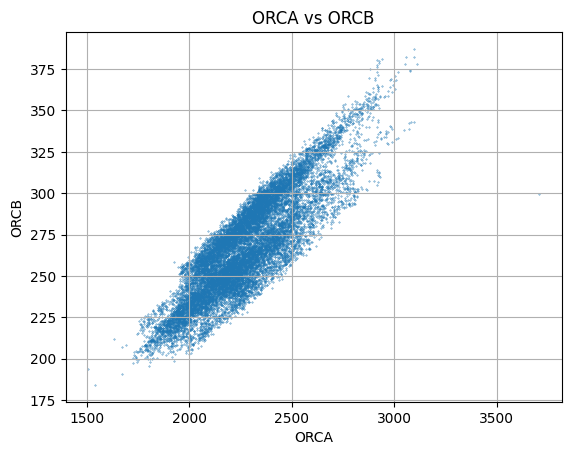

In [ ]:
df = data_mn

plt.scatter(x=df['ORCA'], y=df['ORCB'], s=0.1)
plt.title('ORCA vs ORCB')
plt.xlabel('ORCA')
plt.ylabel('ORCB')
plt.grid(True)


### Series de tiempo
---



### 1. Temperatura vs Fecha

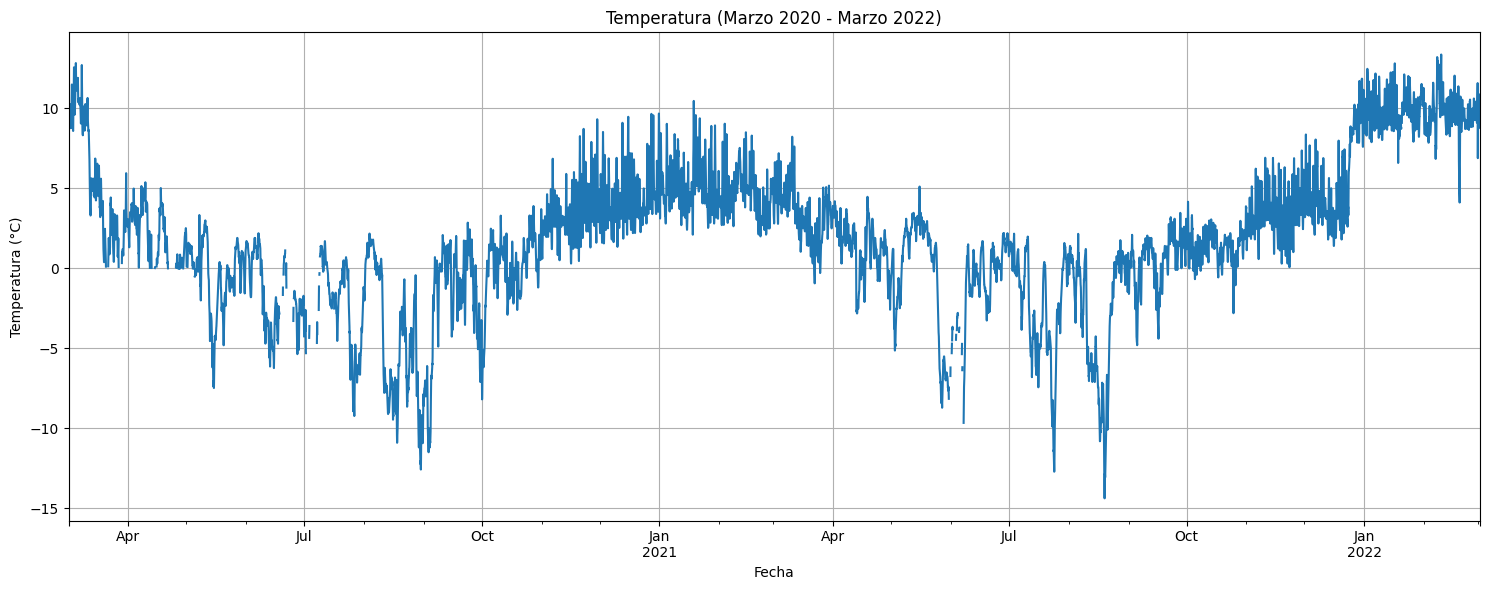

In [ ]:
df = data_mn
#df.set_index('date',inplace=True)
plt.figure(figsize=(15, 6))
df['T'].plot(title='Temperatura (Marzo 2020 - Marzo 2022)')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Fecha')
plt.grid(True)
plt.tight_layout()
plt.show()

### 2. Presión vs Fecha

##### Data sin normalizar

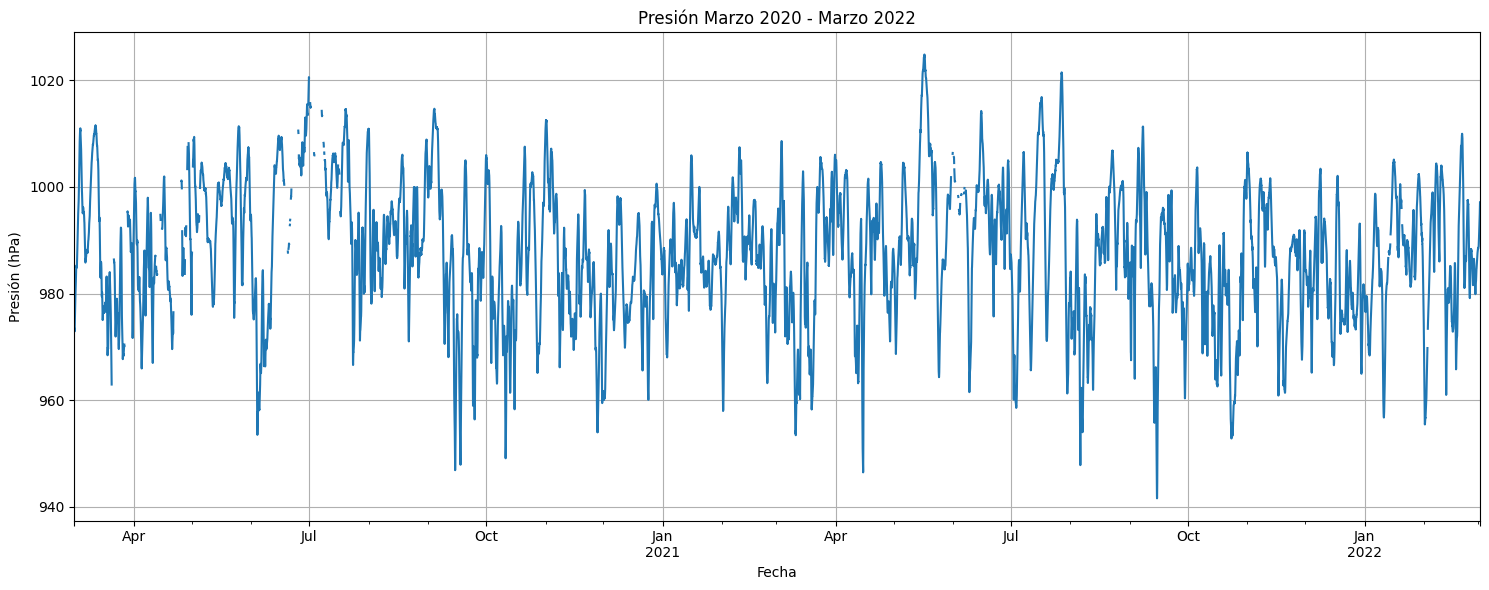

In [ ]:
df = data_mn
#df.set_index('date',inplace=True)
plt.figure(figsize=(15, 6))
df['P'].plot(title='Presión Marzo 2020 - Marzo 2022')
plt.ylabel('Presión (hPa)')
plt.xlabel('Fecha')
plt.grid(True)
plt.tight_layout()
plt.show()

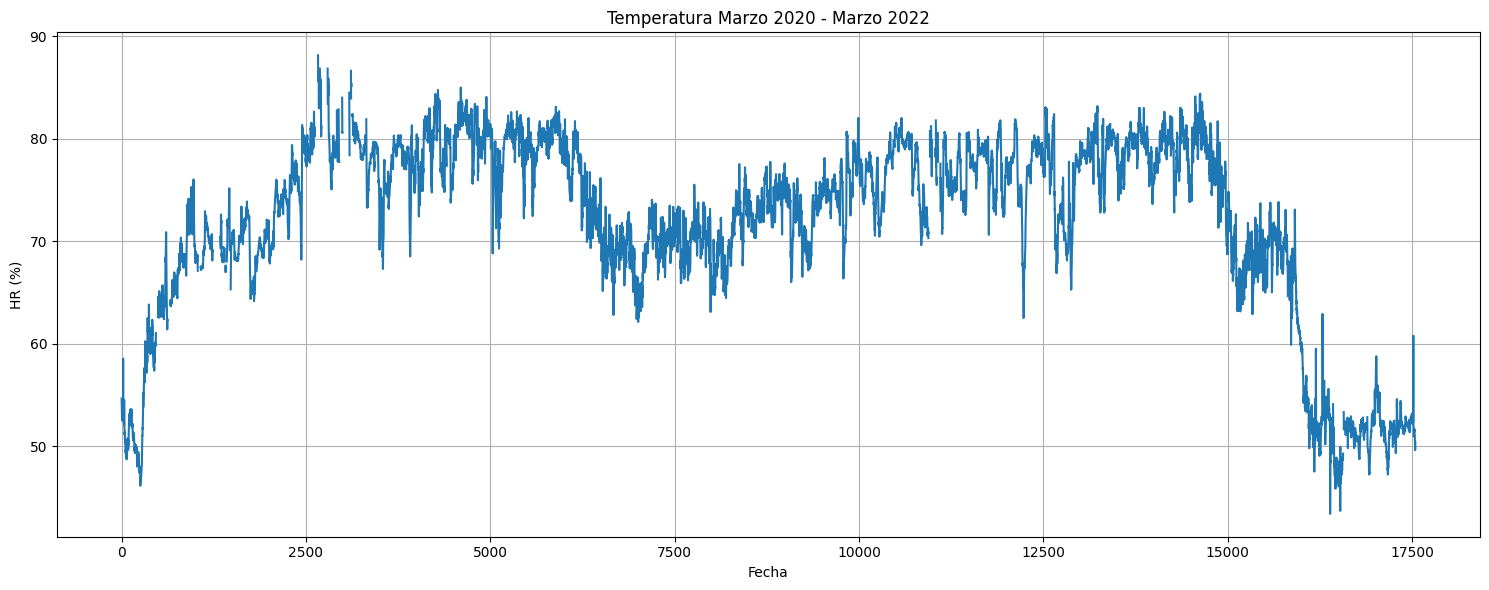

In [ ]:
df = data_mn
#df.set_index('date',inplace=True)
plt.figure(figsize=(15, 6))
df['HR'].plot(title='HR(%) Marzo 2020 - Marzo 2022')
plt.ylabel('HR (%)')
plt.xlabel('Fecha')
plt.grid(True)
plt.tight_layout()
plt.show()

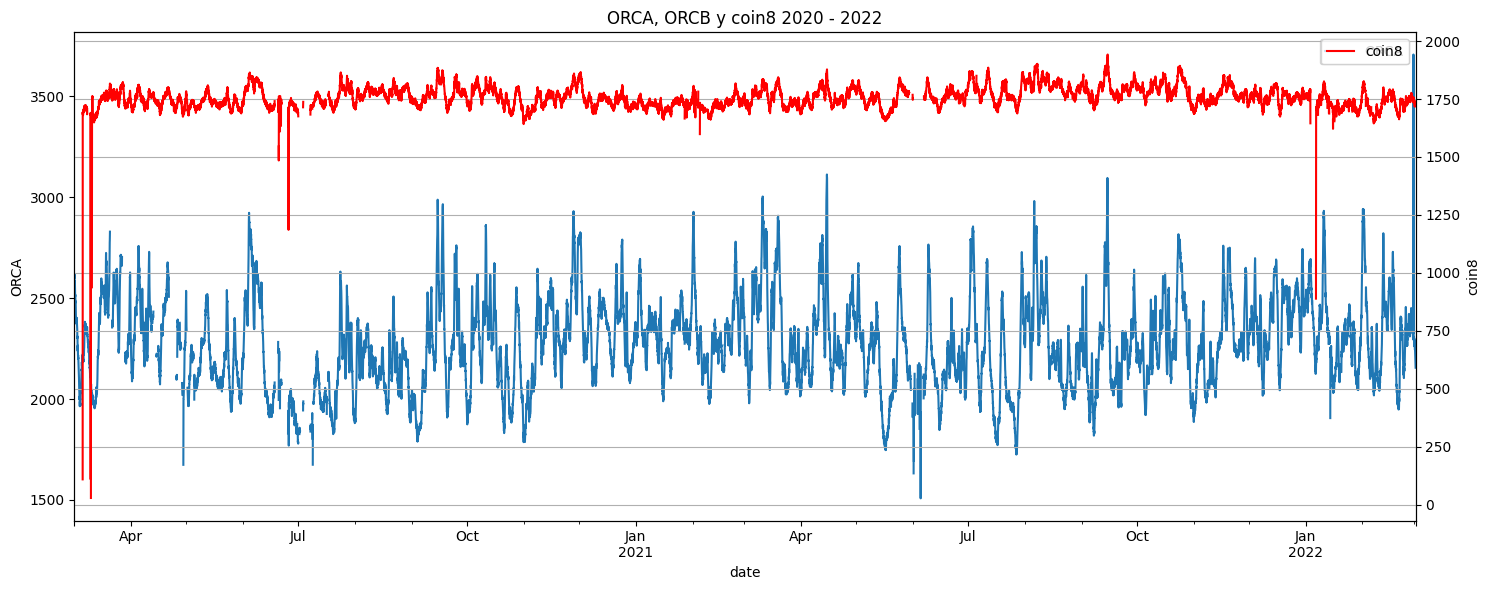

In [ ]:
plt.figure(figsize=(15, 6))

# Plotear la temperatura
df['ORCA'].plot(label='ORCA', legend=True)
plt.ylabel('ORCA')

# Crear un segundo eje y para la presión
# ax2 = plt.gca().twinx()
# df['ORCB'].plot(ax=ax2, color='green', label='ORCB', legend=True)
# ax2.set_ylabel('ORCB')

ax3 = plt.gca().twinx()
df['coin8'].plot(ax=ax3, color='red', label='coin8', legend=True)
ax3.set_ylabel('coin8')

plt.title('ORCA, ORCB y coin8 2020 - 2022')
plt.xlabel('Fecha')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
df = data_mn
df_normalizada = (data_mn - np.mean(data_mn))/np.std(data_mn)
df_normalizada

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ORCA      ORCB     coin8       Top    Bottom  \
date                                                                    
2020-03-01 00:00:00  1.474704  2.004909       NaN  0.462978 -0.121147   
2020-03-01 01:00:00  1.517059  2.012016       NaN  0.559936 -0.036773   
2020-03-01 02:00:00  1.548741  1.896994       NaN  0.489279  0.037121   
2020-03-01 03:00:00  1.394876  1.852083       NaN  0.508071  0.001493   
2020-03-01 04:00:00  1.399650  1.704832       NaN  0.493011 -0.010771   
...                       ...       ...       ...       ...       ...   
2022-03-01 19:00:00 -0.288674  0.532065 -0.507572 -0.348882 -0.258148   
2022-03-01 20:00:00 -0.287413  0.515947 -0.416608 -0.375921 -0.346557   
2022-03-01 21:00:00 -0.418276  0.440392 -0.513129 -0.413549 -0.354940   
2022-03-01 22:00:00 -0.450262  0.404258 -0.475398 -0.485421 -0.355484   
2022-03-01 23:00:00 -0.546549  0.246979 -0.681311 -0.576867 -0.540997   

                            P         T        HR  
date                                               
2020-03-01 00:00:00 -1.112632  1.762172 -1.991504  
2020-03-01 01:00:00 -1.141957  1.740504 -2.029712  
2020-03-01 02:00:00 -1.152214  1.710991 -2.090081  
2020-03-01 03:00:00 -1.148269  1.696421 -2.108421  
2020-03-01 04:00:00 -1.101454  1.685587 -2.119502  
...                       ...       ...       ...  
2022-03-01 19:00:00  0.550876  2.026294 -2.481907  
2022-03-01 20:00:00  0.593878  2.026294 -2.531196  
2022-03-01 21:00:00  0.651081  1.980717 -2.569404  
2022-03-01 22:00:00  0.708548  1.862292 -2.538455  
2022-03-01 23:00:00  0.759308  1.753953 -2.480188  

[17544 rows x 8 columns]

#### Gráfico de ORCA y ORCB normalizados

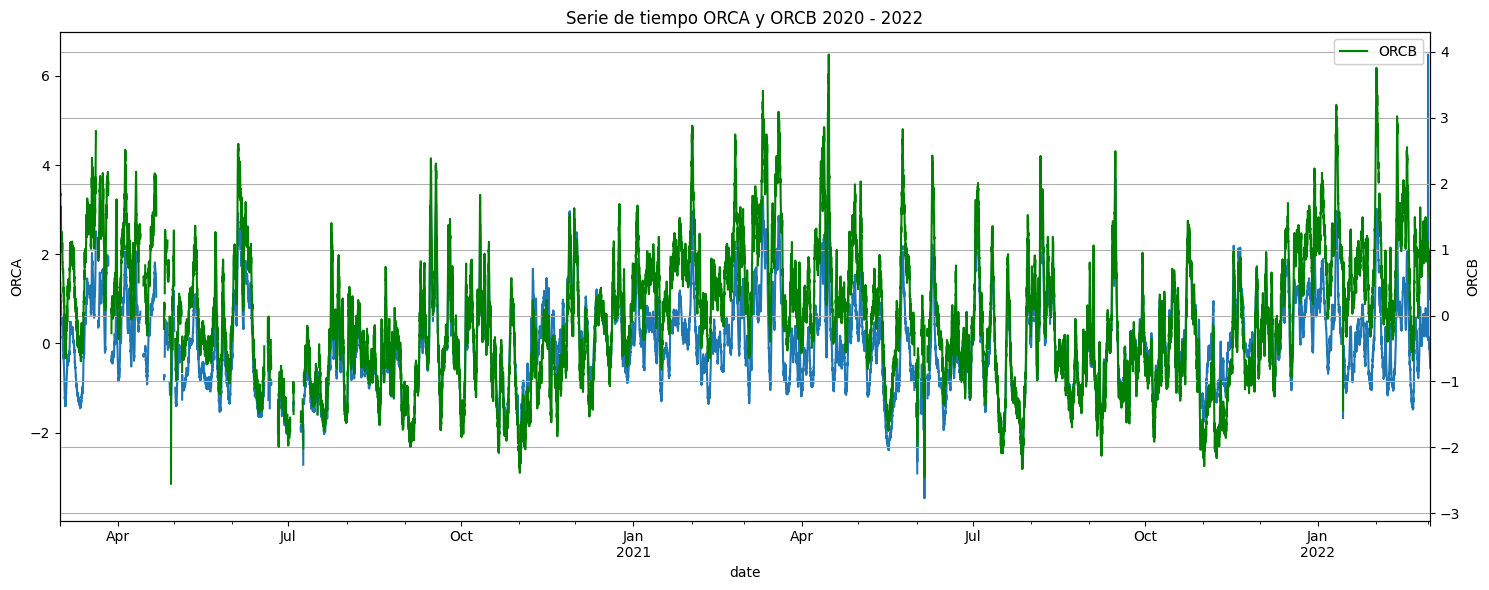

In [ ]:
plt.figure(figsize=(15, 6))

# Plotear la temperatura
df_normalizada['ORCA'].plot(label='ORCA', legend=True)
plt.ylabel('ORCA')

# Crear un segundo eje y para la presión
ax2 = plt.gca().twinx()
df_normalizada['ORCB'].plot(ax=ax2, color='green', label='ORCB', legend=True)
ax2.set_ylabel('ORCB')

# ax3 = plt.gca().twinx()
# df_normalizada['coin8'].plot(ax=ax3, color='red', label='coin8', legend=True)
# ax3.set_ylabel('coin8')

plt.title('Serie de tiempo ORCA y ORCB 2020 - 2022')
plt.xlabel('Fecha')
plt.grid(True)
plt.tight_layout()
plt.show()

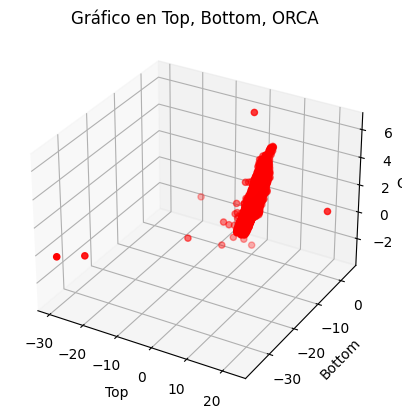

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = df_normalizada

# Crear una figura en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Obtener los datos de las columnas
x = df['Top']
y = df['Bottom']
z = df['ORCA']

# Crear el gráfico en 3D
ax.scatter(x, y, z, c='r', marker='o')

# Etiquetas de los ejes
ax.set_xlabel('Top')
ax.set_ylabel('Bottom')
ax.set_zlabel('ORCA')

# Título del gráfico
plt.title('Gráfico en Top, Bottom, ORCA')

# Mostrar el gráfico
plt.show()


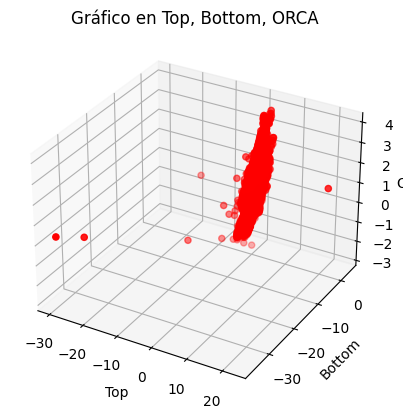

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = df_normalizada

# Crear una figura en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Obtener los datos de las columnas
x = df['Top']
y = df['Bottom']
z = df['ORCB']

# Crear el gráfico en 3D
ax.scatter(x, y, z, c='r', marker='o')

# Etiquetas de los ejes
ax.set_xlabel('Top')
ax.set_ylabel('Bottom')
ax.set_zlabel('ORCA')

# Título del gráfico
plt.title('Gráfico en Top, Bottom, ORCA')

# Mostrar el gráfico
plt.show()


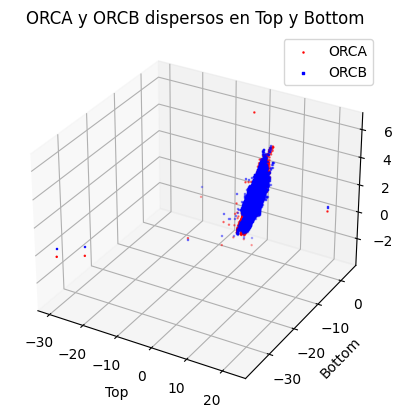

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Listas de coordenadas de puntos
df = df_normalizada
x_values = df["Top"]
y_values = df["Bottom"]
z1_values = df["ORCA"]
z2_values = df["ORCB"]

# Crear una figura en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dibujar los puntos de z1
ax.scatter(x_values, y_values, z1_values, c='r', marker='o', s=0.6, label='ORCA')

# Dibujar los puntos de z2
ax.scatter(x_values, y_values, z2_values, c='b', marker='s', s=0.6, label='ORCB')

# Etiquetas de los ejes
ax.set_xlabel('Top')
ax.set_ylabel('Bottom')
ax.set_zlabel('Tipo de ORC')

# Título del gráfico
plt.title('ORCA y ORCB dispersos en Top y Bottom')

# Leyenda
ax.legend()

# Hacer el gráfico interactivo y rotable
ax.mouse_init()

# Mostrar el gráfico
plt.show()


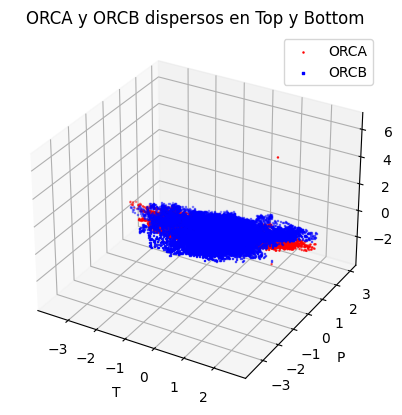

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Listas de coordenadas de puntos
df = df_normalizada
x_values = df["T"]
y_values = df["P"]
z1_values = df["ORCA"]
z2_values = df["ORCB"]

# Crear una figura en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dibujar los puntos de z1
ax.scatter(x_values, y_values, z1_values, c='r', marker='o', s=0.6, label='ORCA')

# Dibujar los puntos de z2
ax.scatter(x_values, y_values, z2_values, c='b', marker='s', s=0.6, label='ORCB')


# Etiquetas de los ejes
ax.set_xlabel('T')
ax.set_ylabel('P')
ax.set_zlabel('Tipo de ORC')

# Título del gráfico
plt.title('ORCA y ORCB dispersos en Top y Bottom')

# Leyenda
ax.legend()

# Hacer el gráfico interactivo y rotable
ax.mouse_init()

# Mostrar el gráfico
plt.show()


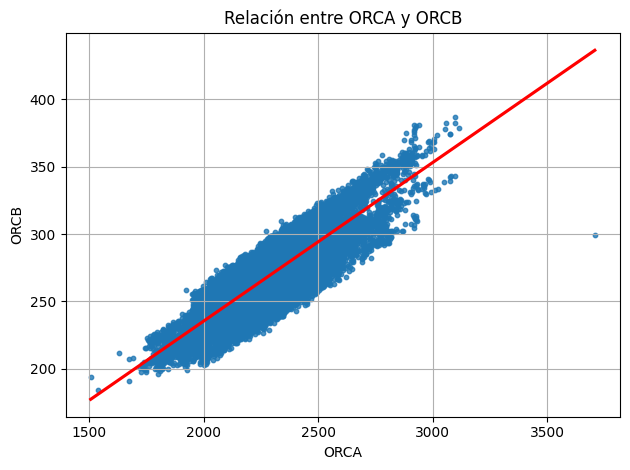

In [ ]:
# Usar seaborn para crear el scatterplot y la línea de regresión
import seaborn as sns
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(df['ORCA'], df['ORCB'])
r_squared = r_value**2


sns.regplot(x='ORCA', y='ORCB', data=df, scatter_kws={'s':10}, line_kws={'color':'red'}, ci=None)

plt.title('Relación entre ORCA y ORCB')
plt.xlabel('ORCA')
plt.ylabel('ORCB')
plt.grid(True)
#plt.text(21, 1015, f'$r^2 = {r_squared:.2f}$', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

## PREGUNTAS PENDIENTES

1. ¿Cuáles son los puntos geográficos que se manejaran en la investigación? ¿ Los del artículo o los que consignan en el correo?
2. ¿Qué significa HR% y cómo se explica su relación?
3. ¿Qué variables de la data Christianh.csv se desean buscar correlacionar con los de la data cdsapi (copernicus)?
4. ¿Qué sinifica TOP, Bottom, Coin8?
5. ¿Qué sugiere para trabajar con la data faltante? ¿Eliminar los registros? ¿Llenarlos con medias o valores estándar? ¿Crear funciones y estimarlas?
6. ¿Requiere estimar estacionalidad en las series de tiempo?
7. ¿Se requiere eliminar los puntos Outliers de la data Christianh.csv? ¿O son relevantes?
8. ¿Cómo calculan los relative counts de ORCA, ORCB, TOP, Bottom y Coin8? ¿Son estandarizaciones?
9. ¿Requiere que se aplique los factores de corrección $β_{P}$ y $β_{T}$ (del artículo) a la data de Christianh.csv para los valores de ORCA y ORCB según la fórmula $N_{ic}=N_{i}^{-β_{P}(P_0 - P_1)}$ (del artículo)? ¿O ya está aplicada?
10. ¿ La data de data cdsapi (copernicus) requiere también factores de corrección? ¿Si es sí, dónde se encontraría esa información o como se calcularía?

